## Visualization Notebook for Article 2019-08-04
### Google It: Medical, Part of Missing Medical Data
### By: Vincent Brandon

In [92]:
# Import libraries
import pandas as pd


In [93]:
# Load data
data = pd.read_csv("batch_1.csv", index_col='date')
data.head()

,appendicitis,radiation,intrameningeat,hydrocele,histiogeuic,zymophyte,parotidoscIeTosis,rapid,manyplies,oophoron,...,nasoantritis,coarct,autochthonous,sacculocochlear,amphicelous,gnathalgia,chromaturia,ampere,pseudoglioma,chondroglossus
date,,,,,,,,,,,,,,,,,,,,,
2014-08-10,19,45,0,3,0,0,0,81,0,0,...,0,0,6,0,0,0,0,59,0,0
2014-08-17,19,49,0,3,0,0,0,82,0,0,...,0,2,12,0,0,0,0,62,0,0
2014-08-24,19,46,0,3,0,0,0,80,0,0,...,0,1,10,0,0,0,0,65,0,0
2014-08-31,19,47,0,3,0,0,0,78,0,0,...,0,0,7,0,0,0,0,70,0,0
2014-09-07,19,56,0,3,0,0,0,76,0,0,...,0,0,8,0,0,0,0,68,0,0


In [94]:
df = data.copy()
type(df)

pandas.core.frame.DataFrame

In [95]:
df = pd.DataFrame(df.stack(), columns=['trend'])
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


trend
date                            
2014-08-10 appendicitis       19
           radiation          45
           intrameningeat      0
           hydrocele           3
           histiogeuic         0

In [96]:
df = df.reset_index(level=1)
df.columns=['term', 'trend']
df.head()

,term,trend
date,,
2014-08-10,appendicitis,19
2014-08-10,radiation,45
2014-08-10,intrameningeat,0
2014-08-10,hydrocele,3
2014-08-10,histiogeuic,0


In [97]:
df['word_len'] = df.term.str.len()
df.head()

,term,trend,word_len
date,,,
2014-08-10,appendicitis,19,12
2014-08-10,radiation,45,9
2014-08-10,intrameningeat,0,14
2014-08-10,hydrocele,3,9
2014-08-10,histiogeuic,0,11


In [98]:
df.describe()

,trend,word_len
count,254800.000000,254800.000000
mean,12.405177,10.429592
std,23.871773,3.386375
min,0.000000,4.000000
25%,0.000000,8.000000
50%,0.000000,10.000000
75%,10.000000,13.000000
max,100.000000,23.000000


In [99]:
df['txw'] = df.trend*df.word_len
df.head()

,term,trend,word_len,txw
date,,,,
2014-08-10,appendicitis,19,12,228
2014-08-10,radiation,45,9,405
2014-08-10,intrameningeat,0,14,0
2014-08-10,hydrocele,3,9,27
2014-08-10,histiogeuic,0,11,0


In [100]:
df1 = df.drop(columns=['term', 'trend', 'word_len'])

In [101]:
df1 = df1.groupby(level='date').mean()
df1.head()

,txw
date,
2014-08-10,94.184694
2014-08-17,93.274490
2014-08-24,93.544898
2014-08-31,94.271429
2014-09-07,100.984694


In [120]:
# Plot Setup
import numpy as np

# xticks
xlabels = set([dt[0:7] for dt in df1.index.values])
xticks = np.arange(len(xlabels))

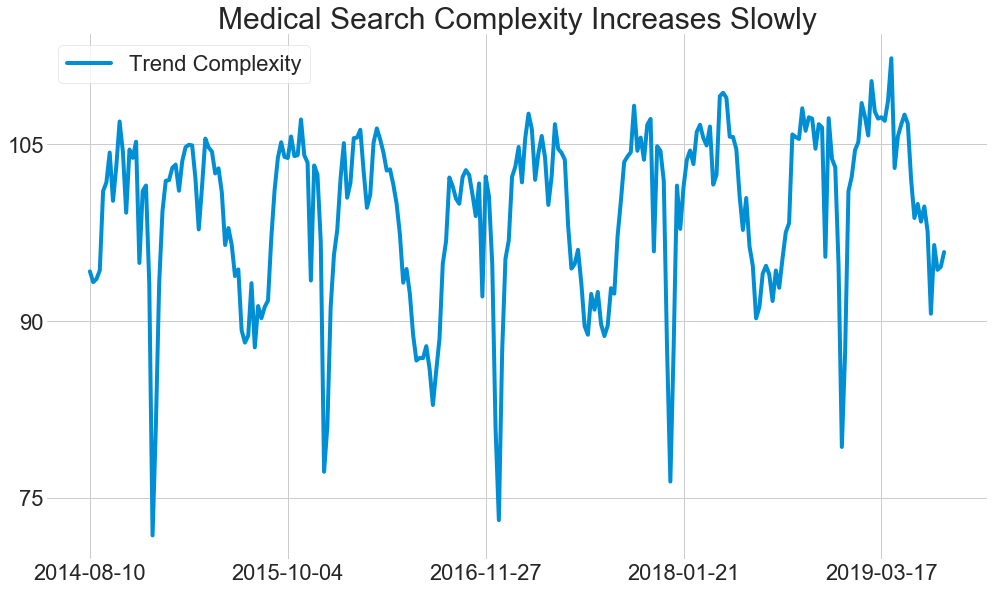

In [136]:
# Generate plot for txw over time
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,9))
ax = sns.lineplot(data=df1)

# Remove the plot frame lines. They are unnecessary here.
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.yaxis.set_major_locator(plt.MaxNLocator(4))

ax.set_xlabel('')

ax.legend(['Trend Complexity'])
ax.set_title('Medical Search Complexity Increases Slowly', fontsize=30)

plt.show()

In [223]:
# Find top performers

df2 = df[['term', 'txw']]
df2 = df2.reset_index()
df2['year'] = df2.date.str.split('-').str[0]
df2 = df2.drop(columns='date')
df2.head()

#2014
condition_year_a = df2.year== '2014'
top10_2014 = df2[condition_year_a].sort_values('txw', ascending=False).head(5)
top10_2014['year'] = top100_2014.year.astype('int')
#2019
condition_year_b = df2.year == '2019'
top10_2019 = df2[condition_year_b].sort_values('txw', ascending=False).head(5)
top10_2019['year'] = top100_2019.year.astype('int')

In [224]:
# Display
from IPython.display import display

display(top100_2014.head(), top100_2019.head())

,term,txw,year
10134,pterygomandibular,1479,2014
13252,carcinogenesis,1400,2014
13856,pancreatectomy,1400,2014
13434,differentiated,1400,2014
9514,differentiated,1344,2014


,term,txw,year
234554,pterygomandibular,1513,2019
238713,thyrotoxicosis,1400,2019
241414,pterygomandibular,1394,2019
236753,thyrotoxicosis,1386,2019
232594,pterygomandibular,1343,2019


In [225]:
df2_conc = pd.concat(objs=[top10_2014, top10_2019])
df2_conc['year'] = df2_conc.year.astype('int')
df2_conc.dtypes

term    object
txw      int64
year     int32
dtype: object

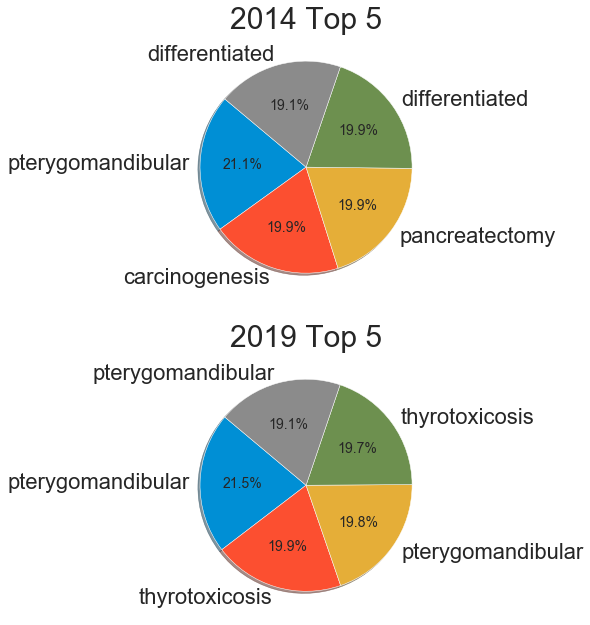

In [241]:
# Plot words over time 
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

ax[0].pie(top10_2014.txw, labels=top10_2014.term, 
       autopct='%1.1f%%', shadow=True, startangle=140)
ax[0].set_title('2014 Top 5', fontsize=30)

ax[1].pie(top10_2019.txw, labels=top10_2019.term, 
       autopct='%1.1f%%', shadow=True, startangle=140)
ax[1].set_title('2019 Top 5', fontsize=30)

plt.show()